## 내일배움카드 목록

In [17]:
import matplotlib.font_manager as fm

# KoPubDotum_Pro 폰트 사용
plt.rcParams['font.family'] = 'KoPubDotum_Pro'

In [ ]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd

auth_key = "여기다가자신의api키를넣으세요"
base_url = "https://www.work24.go.kr/cm/openApi/call/hr/callOpenApiSvcInfo310L01.do"

all_data = []
page_num = 1

while True:
    params = {
        "authKey": auth_key,
        "returnType": "XML",
        "outType": "1",
        "pageNum": str(page_num),
        "pageSize": "100",
        "srchTraStDt": "20250101",
        "srchTraEndDt": "20251231",
        "srchNcs1": "20",           # 정보통신
        "crseTracseSe": "C0104",    # K-디지털 트레이닝
        "sort": "ASC",
        "sortCol": "TOT_FXNUM"
    }

    response = requests.get(base_url, params=params)
    root = ET.fromstring(response.content)
    items = list(root.iter("scn_list"))

    if not items:
        break

    for item in items:
        all_data.append({
            "과정명": item.findtext("title"),
            "기관ID": item.findtext("trainstCstId"),
            "과정ID": item.findtext("trprId"),
            "회차": item.findtext("trprDegr"),
            "등급": item.findtext("grade"),
            "만족도": item.findtext("stdgScor"),
            "취업률_3개월": item.findtext("eiEmplRate3"),
            "취업률_6개월": item.findtext("eiEmplRate6"),
            "수강비": item.findtext("courseMan"),
            "실제훈련비": item.findtext("realMan"),
            "정원": item.findtext("yardMan"),
            "훈련대상": item.findtext("trainTarget"),
            "커리큘럼": item.findtext("contents")
        })

    page_num += 1
    if page_num > 10:  # 약 980개니까 10페이지면 충분
        break

# DataFrame 생성 및 저장
df = pd.DataFrame(all_data)
df.to_csv("KDT_훈련과정_정보통신_2025.csv", index=False, encoding="utf-8-sig")
print("CSV 저장 완료! 파일명: KDT_훈련과정_정보통신_2025.csv")
df.head()

CSV 저장 완료! 파일명: KDT_훈련과정_정보통신_2025.csv


,과정명,기관ID,과정ID,회차,등급,만족도,취업률_3개월,취업률_6개월,수강비,실제훈련비,정원,훈련대상,커리큘럼
0,에듀테크 상품서비스 PM(프로덕트매니저) 양성,500037189659,AIG20230000412832,12,,748,,,17424000,17424000,16,K-디지털 트레이닝,
1,에듀테크 상품서비스 PM(프로덕트매니저) 양성,500037189659,AIG20230000412832,13,,748,,,17424000,17424000,16,K-디지털 트레이닝,
2,빅데이터 기반 컴퓨터비전(CV) 데이터사이언스 과정,500020016144,AIG20240000498272,1,,00,,,8999360,8999360,20,K-디지털 트레이닝,
3,"클라우드 기반의 자바 풀스택 (Springboot, React, flutter) 개발자",500020056026,AIG20230000412819,9,,965,,,9097920,9097920,20,K-디지털 트레이닝,
4,"프로젝트기반 웹&앱(자바,스프링,리액트,노코드) SW개발자 양성과정",500020054642,AIG20230000455754,4,,880,,,10803780,10803780,20,K-디지털 트레이닝,


In [ ]:
# @title 컬럼 추가 이후 20~25년도 엑셀 파일 작성

import requests
import xml.etree.ElementTree as ET
import pandas as pd

auth_key = "여기다가자신의api키를넣으세요"
base_url = "https://www.work24.go.kr/cm/openApi/call/hr/callOpenApiSvcInfo310L01.do"

all_data = []
year_counts = {}

for year in range(2020, 2026):
    count = 0
    for page_num in range(1, 11):  # 최대 10페이지 (약 1,000건)
        params = {
            "authKey": auth_key,
            "returnType": "XML",
            "outType": "1",
            "pageNum": str(page_num),
            "pageSize": "100",
            "srchTraStDt": f"{year}0101",
            "srchTraEndDt": f"{year}1231",
            "srchNcs1": "20",           # 정보통신
            "crseTracseSe": "C0104",    # K-디지털 트레이닝
            "sort": "ASC",
            "sortCol": "TOT_FXNUM"
        }

        try:
            response = requests.get(base_url, params=params, timeout=10)
            root = ET.fromstring(response.content)
            items = list(root.iter("scn_list"))

            if not items:
                break

            for item in items:
                all_data.append({
                    "연도": year,
                    "과정명": item.findtext("title"),
                    "부제목": item.findtext("subTitle"),
                    "기관ID": item.findtext("trainstCstId"),
                    "과정ID": item.findtext("trprId"),
                    "회차": item.findtext("trprDegr"),
                    "개강일": item.findtext("traStartDate"),
                    "종강일": item.findtext("traEndDate"),
                    "주소": item.findtext("address"),
                    "전화번호": item.findtext("telNo"),
                    "기관등급": item.findtext("grade"),
                    "만족도": item.findtext("stdgScor"),
                    "취업률_3개월": item.findtext("eiEmplRate3"),
                    "취업률_6개월": item.findtext("eiEmplRate6"),
                    "수강비": item.findtext("courseMan"),
                    "실제훈련비": item.findtext("realMan"),
                    "정원": item.findtext("yardMan"),
                    "신청인원": item.findtext("regCourseMan"),
                    "훈련대상": item.findtext("trainTarget"),
                    "NCS코드": item.findtext("ncsCd"),
                    "커리큘럼": item.findtext("contents"),
                    "상세링크": item.findtext("titleLink")
                })
                count += 1
        except:
            break

    year_counts[year] = count

# DataFrame으로 저장
df = pd.DataFrame(all_data)
excel_path = "KDT_훈련과정_정보통신_2020_2025_확장버전.xlsx"
df.to_excel(excel_path, index=False)


In [12]:
cols_to_numeric = ["만족도", "수강비", "실제훈련비", "정원", "신청인원"]

for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [13]:
# 정원, 신청인원 중 하나라도 결측이면 제거
df_filtered = df.dropna(subset=["정원", "신청인원", "만족도"])

# 정원 0 제외
df_filtered = df_filtered[df_filtered["정원"] != 0]

# 신청률 계산
df_filtered["신청률"] = df_filtered["신청인원"] / df_filtered["정원"]
df_filtered = df_filtered[df_filtered["신청률"] <= 1.0]  # 100% 초과인 경우 제거 (예외처리)

df_filtered[["과정명", "정원", "신청인원", "신청률", "만족도"]].head()


,과정명,정원,신청인원,신청률,만족도
0,인공지능 기반 디지털 전환 구현과정,18,13,0.722222,814
1,인공지능 기반 디지털 전환 구현과정,18,8,0.444444,814
2,인공지능 기반 디지털 전환 구현과정,18,10,0.555556,814
3,S/W개발 및 빅데이터응용 지역핵심인재 양성과정,18,8,0.444444,889
4,인공지능 기반 디지털 전환 구현과정,18,5,0.277778,814


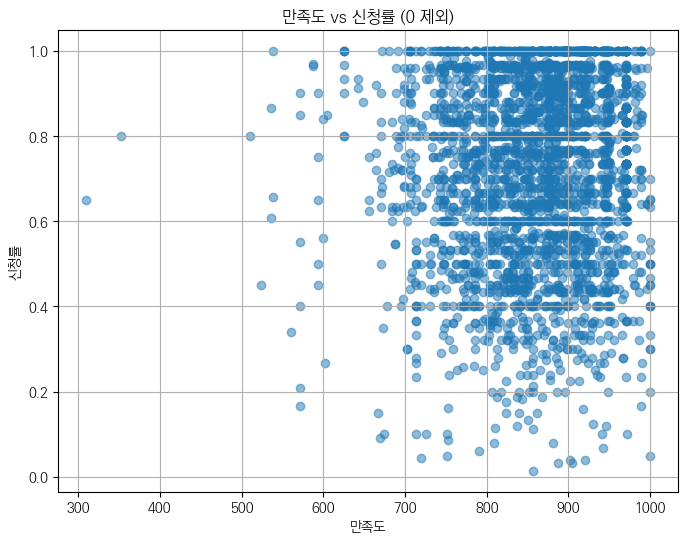

In [ ]:
# @title 0값 제외 후 만족도 vs 신청률 산점도

import matplotlib.pyplot as plt
filtered = df_filtered[(df_filtered["신청률"] > 0) & (df_filtered["만족도"] > 0)]

plt.figure(figsize=(8, 6))
plt.scatter(filtered["만족도"], filtered["신청률"], alpha=0.5)
plt.xlabel("만족도")
plt.ylabel("신청률")
plt.title("만족도 vs 신청률 (0 제외)")
plt.grid(True)
plt.show()


In [22]:
# @title 신청률과 만족도의 상관계수 계산 (0 제외)
correlation = filtered[["신청률", "만족도"]].corr().iloc[0, 1]
print(f"신청률과 만족도 간의 상관계수: {correlation:.4f}")


신청률과 만족도 간의 상관계수: 0.0763


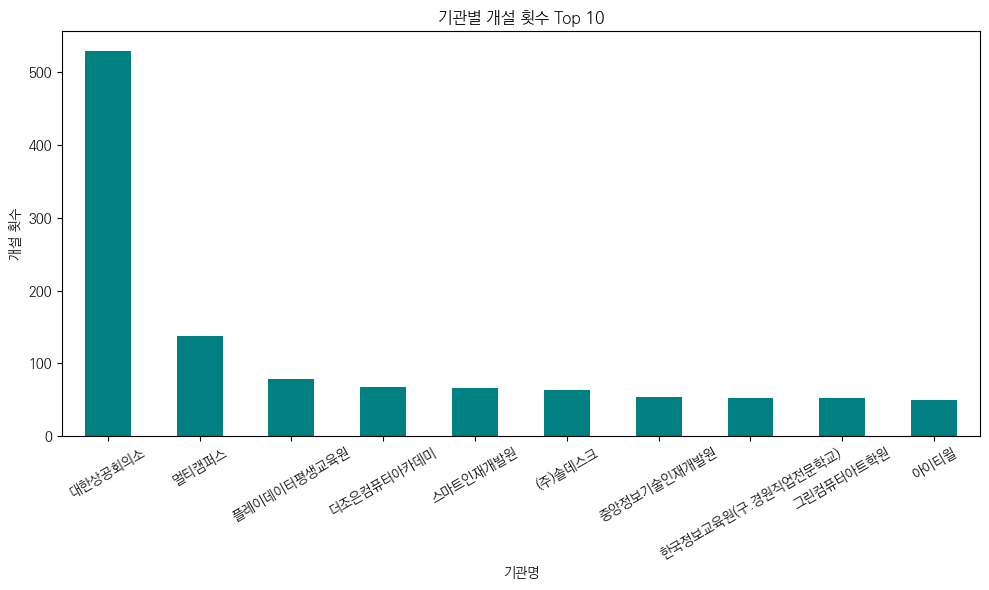

In [30]:
# @title 기관별 개설 횟수 Top 10 시각화
import matplotlib.pyplot as plt

기관별_횟수 = df["부제목"].value_counts().head(10)

plt.figure(figsize=(10, 6))
기관별_횟수.plot(kind="bar", color="teal")
plt.title("기관별 개설 횟수 Top 10")
plt.xlabel("기관명")
plt.ylabel("개설 횟수")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


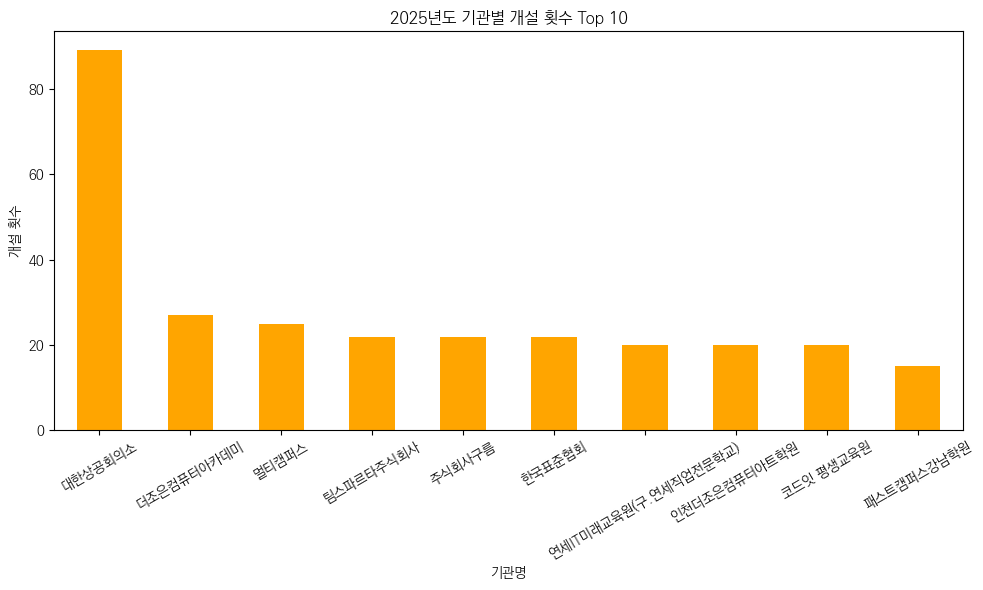

In [32]:
# @title 2025년도 기관별 개설 횟수 Top 10 시각화
df_2025 = df[df["연도"] == 2025]
기관별_횟수_2025 = df_2025["부제목"].value_counts().head(10)

plt.figure(figsize=(10, 6))
기관별_횟수_2025.plot(kind="bar", color="orange")
plt.title("2025년도 기관별 개설 횟수 Top 10")
plt.xlabel("기관명")
plt.ylabel("개설 횟수")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [33]:
df_filtered.describe()

,연도,만족도,수강비,실제훈련비,정원,신청인원,신청률
count,3812.000000,3812.000000,3.812000e+03,3.812000e+03,3812.000000,3812.000000,3812.000000
mean,2023.557450,762.304302,9.699811e+06,9.713952e+06,29.705666,18.997114,0.637964
std,1.094393,283.164427,4.945412e+06,4.941834e+06,15.282761,14.268014,0.320835
min,2022.000000,0.000000,0.000000e+00,0.000000e+00,10.000000,0.000000,0.000000
25%,2023.000000,775.000000,8.339760e+06,8.339760e+06,25.000000,12.000000,0.450000
50%,2024.000000,856.000000,9.147840e+06,9.147840e+06,26.000000,19.000000,0.720000
75%,2025.000000,914.000000,1.144901e+07,1.161408e+07,30.000000,25.000000,0.909091
max,2025.000000,1000.000000,2.940300e+07,2.940300e+07,180.000000,149.000000,1.000000


## 키워드별 인기 수강률 분석

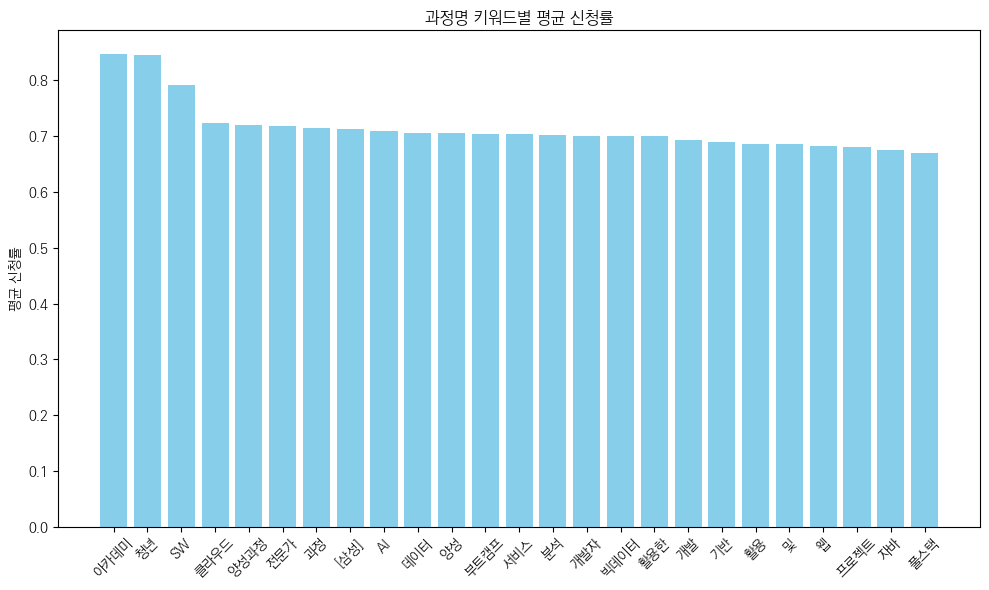

In [ ]:
# @title 과정명 키워드별 평균 신청률

from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# 과정명 리스트에서 단어 분리
words = []
for title in df_filtered["과정명"]:
    words.extend(title.split())

# 가장 많이 나온 단어 Top 10
common_words = [word for word, _ in Counter(words).most_common(25)]

# 키워드별 평균 신청률 계산
결과 = []
for word in common_words:
    포함된_행 = df_filtered[df_filtered["과정명"].str.contains(word, na=False)]
    포함된_행 = 포함된_행[포함된_행["신청률"].notnull()]
    포함된_행 = 포함된_행[포함된_행["신청률"] > 0]
    평균 = 포함된_행["신청률"].mean()
    결과.append((word, 평균))

# 시각화
df_result = pd.DataFrame(결과, columns=["키워드", "평균 신청률"])
df_result = df_result.sort_values(by="평균 신청률", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_result["키워드"], df_result["평균 신청률"], color="skyblue")
plt.title("과정명 키워드별 평균 신청률")
plt.ylabel("평균 신청률")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 신청률

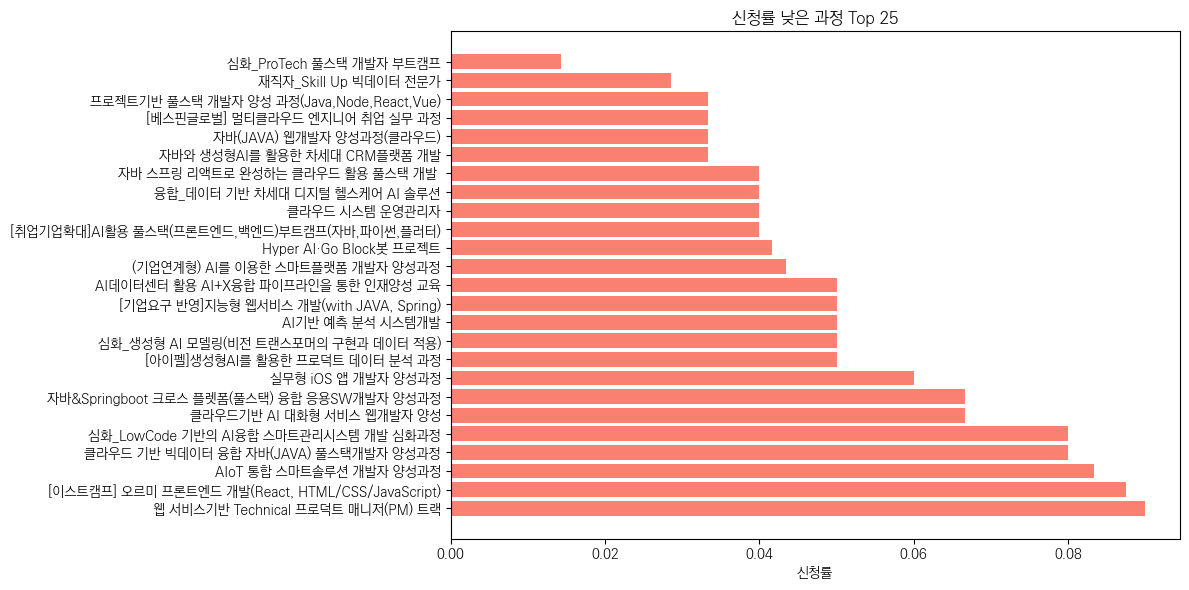

In [44]:
# @title 신청률 낮은 과정 Top 25

import matplotlib.pyplot as plt
import pandas as pd

# 신청률 0 초과만 필터링
df_nonzero = df_filtered[df_filtered["신청률"] > 0]

# 신청률 기준 오름차순 정렬 후 상위 25개 추출
df_lowest = df_nonzero.sort_values(by="신청률", ascending=True).head(25)

# 시각화
plt.figure(figsize=(12, 6))
plt.barh(df_lowest["과정명"], df_lowest["신청률"], color="salmon")
plt.xlabel("신청률")
plt.title("신청률 낮은 과정 Top 25")
plt.gca().invert_yaxis()  # 낮은 순이 위로 오도록
plt.tight_layout()
plt.show()


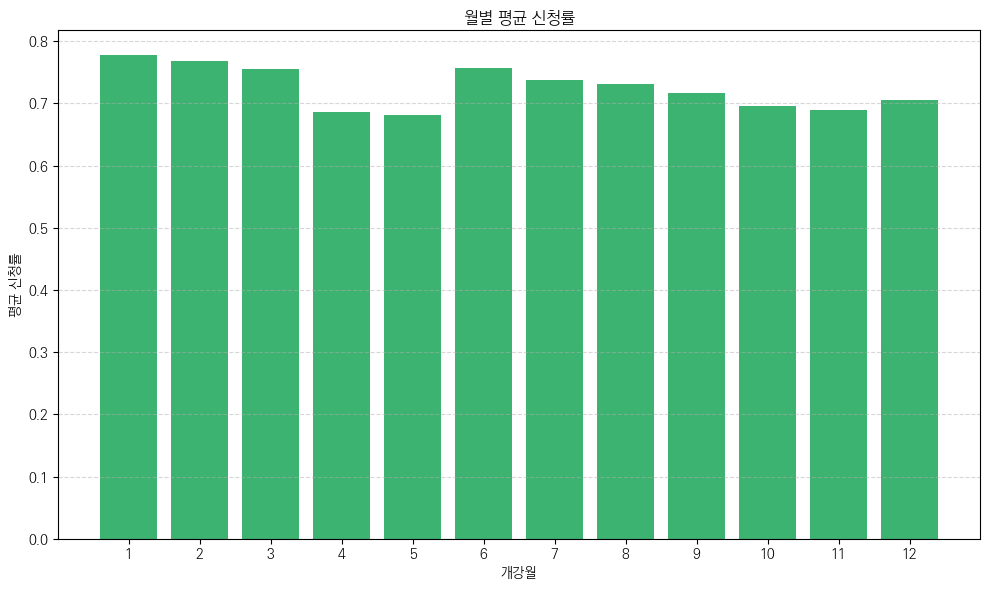

In [47]:
# @title 개강월별 평균 신청률 분석

import pandas as pd
import matplotlib.pyplot as plt

# 개강일을 datetime 형식으로 변환
df_filtered["개강일"] = pd.to_datetime(df_filtered["개강일"], errors="coerce")

# 개강월 컬럼 추가
df_filtered["개강월"] = df_filtered["개강일"].dt.month

# 신청률이 0보다 큰 데이터만 사용
df_month = df_filtered[df_filtered["신청률"] > 0]

# 월별 신청률 평균 계산
monthly_rate = df_month.groupby("개강월")["신청률"].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(monthly_rate["개강월"], monthly_rate["신청률"], color="mediumseagreen")
plt.title("월별 평균 신청률")
plt.xlabel("개강월")
plt.ylabel("평균 신청률")
plt.xticks(range(1, 13))
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


## 훈련일정 api merge

In [48]:
df_filtered[["과정명", "과정ID", "회차", "기관ID"]].head(1)

,과정명,과정ID,회차,기관ID
0,인공지능 기반 디지털 전환 구현과정,AIG20200000286658,3,500020045827


In [ ]:
# @title 훈련일정 API 테스트 호출 (단일 과정)

import requests
import xml.etree.ElementTree as ET

url = "https://www.work24.go.kr/cm/openApi/call/hr/callOpenApiSvcInfo310L03.do"

params = {
    "authKey": "여기다가자신의api키를넣으세요",
    "returnType": "XML",
    "outType": "2",
    "srchTrprId": "AIG20200000286658",
    "srchTrprDegr": "3",
    "srchTorgId": "500020045827"
}

response = requests.get(url, params=params)
root = ET.fromstring(response.content)

# 응답 확인
for item in root.iter("scn_list"):
    결과 = {
        "과정명": item.findtext("trprNm"),
        "수료인원": item.findtext("finiCnt"),
        "총훈련비": item.findtext("totTrco"),
        "수강인원": item.findtext("totTrpCnt"),
        "3개월 취업률": item.findtext("eiEmplRate3"),
        "6개월 취업률": item.findtext("eiEmplRate6"),
        "6개월 미가입자 취업률": item.findtext("hrdEmplRate6"),
        "훈련시작일": item.findtext("trStaDt"),
        "훈련종료일": item.findtext("trEndDt")
    }

print(결과)


{'과정명': '인공지능 기반 디지털 전환 구현과정', '수료인원': '10', '총훈련비': '17134440', '수강인원': '21', '3개월 취업률': '44.4', '6개월 취업률': '66.7', '6개월 미가입자 취업률': '0.0', '훈련시작일': '2022-02-22', '훈련종료일': '2022-08-26'}


In [ ]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import time

# 필요한 병합 키 추출
keys = df_filtered[["과정ID", "회차", "기관ID"]].dropna()

# 결과 저장용 리스트
results = []

for _, row in keys.iterrows():
    trpr_id = row["과정ID"]
    trpr_degr = str(row["회차"])
    inst_id = row["기관ID"]

    params = {
        "authKey": "여기다가자신의api키를넣으세요",
        "returnType": "XML",
        "outType": "2",
        "srchTrprId": trpr_id,
        "srchTrprDegr": trpr_degr,
        "srchTorgId": inst_id
    }

    try:
        response = requests.get("https://www.work24.go.kr/cm/openApi/call/hr/callOpenApiSvcInfo310L03.do", params=params, timeout=10)
        root = ET.fromstring(response.content)

        for item in root.iter("scn_list"):
            results.append({
                "과정ID": item.findtext("trprId"),
                "회차": item.findtext("trprDegr"),
                "기관ID": item.findtext("instIno"),
                "과정명": item.findtext("trprNm"),
                "훈련시작일": item.findtext("trStaDt"),
                "훈련종료일": item.findtext("trEndDt"),
                "모집정원": item.findtext("totFxnum"),
                "수강신청인원": item.findtext("totTrpCnt"),
                "실제수강인원": item.findtext("totParMks"),
                "수료인원": item.findtext("finiCnt"),
                "총훈련비": item.findtext("totTrco"),
                "취업률_3개월": item.findtext("eiEmplRate3"),
                "취업인원_3개월": item.findtext("eiEmplCnt3"),
                "취업률_6개월": item.findtext("eiEmplRate6"),
                "취업인원_6개월": item.findtext("eiEmplCnt6"),
                "미가입_취업률_6개월": item.findtext("hrdEmplRate6"),
                "미가입_취업인원_6개월": item.findtext("hrdEmplCnt6")
            })

    except Exception as e:
        print(f"Error for {trpr_id}-{trpr_degr}-{inst_id}: {e}")

    time.sleep(0.1)  # 서버 부하 방지

# 결과 데이터프레임 생성
df_api = pd.DataFrame(results)
df_api.to_csv("/mnt/data/훈련일정_API_전체결과.csv", index=False)
df_api.head()


OSError: Cannot save file into a non-existent directory: '\mnt\data'

In [53]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3809 entries, 0 to 3808
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   과정ID          3809 non-null   object
 1   회차            3809 non-null   object
 2   기관ID          3809 non-null   object
 3   과정명           3809 non-null   object
 4   훈련시작일         3809 non-null   object
 5   훈련종료일         3809 non-null   object
 6   모집정원          3809 non-null   object
 7   수강신청인원        3809 non-null   object
 8   실제수강인원        3371 non-null   object
 9   수료인원          3809 non-null   object
 10  총훈련비          3809 non-null   object
 11  취업률_3개월       3809 non-null   object
 12  취업인원_3개월      2355 non-null   object
 13  취업률_6개월       3809 non-null   object
 14  취업인원_6개월      2074 non-null   object
 15  미가입_취업률_6개월   3809 non-null   object
 16  미가입_취업인원_6개월  3809 non-null   object
dtypes: object(17)
memory usage: 506.0+ KB


In [54]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3812 entries, 0 to 3811
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   연도       3812 non-null   int64         
 1   과정명      3812 non-null   object        
 2   부제목      3812 non-null   object        
 3   기관ID     3812 non-null   object        
 4   과정ID     3812 non-null   object        
 5   회차       3812 non-null   object        
 6   개강일      3812 non-null   datetime64[ns]
 7   종강일      3812 non-null   object        
 8   주소       3812 non-null   object        
 9   전화번호     3812 non-null   object        
 10  기관등급     3812 non-null   object        
 11  만족도      3812 non-null   int64         
 12  취업률_3개월  3812 non-null   object        
 13  취업률_6개월  3812 non-null   object        
 14  수강비      3812 non-null   int64         
 15  실제훈련비    3812 non-null   int64         
 16  정원       3812 non-null   int64         
 17  신청인원     3812 non-null   int64   

In [57]:
import pandas as pd

# 데이터프레임 불러오기 (df_api는 이미 로드된 상태라고 가정)
# 수치형으로 변환할 컬럼 목록
numeric_cols = [
    "모집정원", "수강신청인원", "실제수강인원", "수료인원", "총훈련비",
    "취업률_3개월", "취업인원_3개월", "취업률_6개월", "취업인원_6개월",
    "미가입_취업률_6개월", "미가입_취업인원_6개월"
]

# 수치형으로 변환 (에러 발생 시 NaN 처리)
for col in numeric_cols:
    df_api[col] = pd.to_numeric(df_api[col], errors="coerce")




In [58]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3809 entries, 0 to 3808
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   과정ID          3809 non-null   object 
 1   회차            3809 non-null   object 
 2   기관ID          3809 non-null   object 
 3   과정명           3809 non-null   object 
 4   훈련시작일         3809 non-null   object 
 5   훈련종료일         3809 non-null   object 
 6   모집정원          3809 non-null   int64  
 7   수강신청인원        3809 non-null   int64  
 8   실제수강인원        3371 non-null   float64
 9   수료인원          3809 non-null   int64  
 10  총훈련비          3809 non-null   int64  
 11  취업률_3개월       2355 non-null   float64
 12  취업인원_3개월      2355 non-null   float64
 13  취업률_6개월       2074 non-null   float64
 14  취업인원_6개월      2074 non-null   float64
 15  미가입_취업률_6개월   3809 non-null   float64
 16  미가입_취업인원_6개월  3809 non-null   int64  
dtypes: float64(6), int64(5), object(6)
memory usage: 506.0+ KB
